In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Adapted data of Ltot

Taken from exported graph csv

In [3]:
adapted_data = np.array([16, 433, 480, 491, 411, 502, 390, 651, 632, 61, 474, 609, 449, 543, 546, 534, 8, 580, 512, 494, 600, 650, 8, 557, 556, 430, 195, 577, 8, 16, 610, 159, 604, 572, 510, 512, 245, 64, 408, 198, 485, 516, 572, 573, 308, 521, 428, 464, 98, 343, 555, 611, 517, 8, 391, 593, 47, 530, 201, 493, 508, 49, 616, 570, 532, 515, 445, 528, 546, 581, 380, 532, 457, 575, 550, 522, 578, 495, 496, 75, 473, 702, 426, 689, 461, 563, 467, 530, 534, 574, 550, 627, 574, 463, 129, 491, 372, 574, 87, 424, 173, 675, 575, 549, 505, 8, 535, 605, 542, 574, 481, 445, 503, 554, 381, 524, 607, 431, 16, 534, 515, 564, 439, 513, 531, 120, 628, 481, 576, 538, 215, 598, 595, 505, 594, 507, 319, 391, 401, 611, 16, 595, 16, 635, 554, 525, 449, 16, 16, 191, 588, 122, 481, 581, 507, 63, 594, 571, 536, 517, 467, 499, 615, 634, 202, 522, 484, 24, 587, 437, 16, 551, 470, 600, 16, 527, 459, 590, 525, 67, 624, 90])
print("adapted_data mean:", np.mean(adapted_data))
print("adapted_data std:", np.std(adapted_data))

adapted_data mean: 435.4175824175824
adapted_data std: 192.87683628827202


## Non-adapted data of Ltot

In [4]:
non_adapted_data = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
print("adapted_data mean:", np.mean(non_adapted_data))
print("adapted_data std:", np.std(non_adapted_data))

adapted_data mean: 0.024875621890547265
adapted_data std: 0.15574602828356746


## Normal Distribution and Variance

- Neither adapted data or non-adapted data follow a normal distribution.
- The variances of the two datasets are not similar.

## Augmenting data for 3 games

In [5]:
np.random.seed(20)

# we need the best of 3 scores, so we can use the max of 3 random samples of the distribution
# repeated 10000 times, then take confidence interval
aug_n = 10000
k = 3  # games
conf_interval = 0.05
adapted_data_3_runs = []

for _ in range(aug_n):
    # each score is independent
    rand_scores = np.random.choice(adapted_data, size=k, replace=True)
    adapted_data_3_runs.append(np.mean(rand_scores))

print("adapted_data_3_runs mean:", np.mean(adapted_data_3_runs))
print("adapted_data_3_runs std:", np.std(adapted_data_3_runs))

adapted_data_3_runs mean: 436.0492333333333
adapted_data_3_runs std: 111.76498849754634


Adapted data does not follow a normal distribution


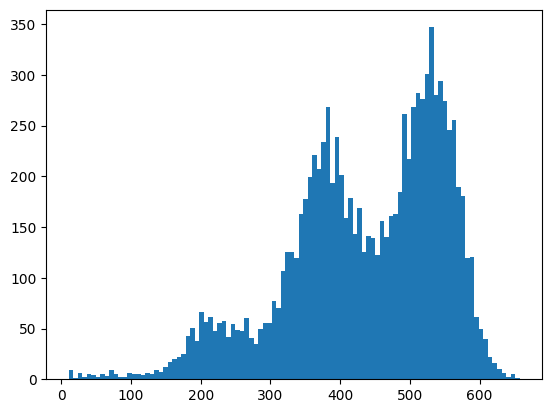

In [6]:
print("Adapted data does not follow a normal distribution")
plt.hist(adapted_data_3_runs, bins=100)
plt.show()


In [7]:
np.random.seed(20)

# we need the best of 3 scores, so we can use the max of 3 random samples of the distribution
# repeated 10000 times, then take confidence interval
aug_n = 10000
k = 3  # games
conf_interval = 0.05
non_adapted_data_3_runs = []

for _ in range(aug_n):
    # each score is independent
    rand_scores = np.random.choice(non_adapted_data, size=k, replace=True)
    non_adapted_data_3_runs.append(np.mean(rand_scores))

print("non_adapted_data_3_runs mean:", np.mean(non_adapted_data_3_runs))
print("non_adapted_data_3_runs std:", np.std(non_adapted_data_3_runs))

non_adapted_data_3_runs mean: 0.026733333333333324
non_adapted_data_3_runs std: 0.09343325603516839


Non adapted data does not follow a normal distribution


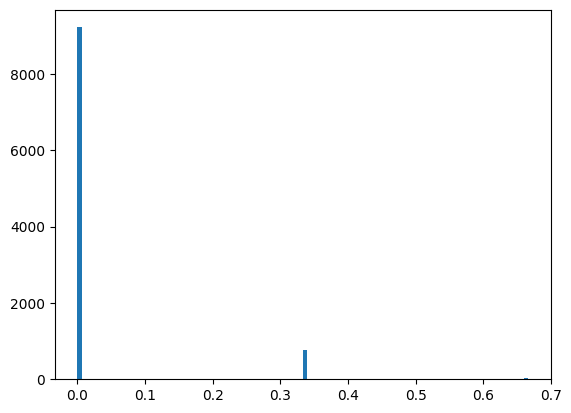

In [8]:
print("Non adapted data does not follow a normal distribution")
plt.hist(non_adapted_data_3_runs, bins=100)
plt.show()

## Mann-Whitney Test

In [9]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test
u_statistic, p_value = mannwhitneyu(adapted_data_3_runs, non_adapted_data_3_runs, alternative="two-sided")

print("U-statistic:", u_statistic)
print("P-value:", p_value)

conf_level = 0.05

if p_value < conf_level:
    print("Reject H0. The difference between the adapted data and non-adapted data is statistically significant.")
else:
    print("Failed to reject H0. The difference between the adapted data and non-adapted data is not statistically significant.")


U-statistic: 100000000.0
P-value: 0.0
Reject H0. The difference between the adapted data and non-adapted data is statistically significant.
